In [1]:
import pandas as pd
import datetime

all_o3_df = pd.read_csv("./all_years_o3.csv")
#turn date column elements into datetime objects
all_o3_df["Date"] = pd.to_datetime(all_o3_df["Date"])
all_o3_df = all_o3_df.set_index("Date")

all_pm25_df = pd.read_csv("./all_years_pm25.csv")
#turn date column elements into datetime objects
all_pm25_df["Date"] = pd.to_datetime(all_pm25_df["Date"])
all_pm25_df = all_pm25_df.set_index("Date")
all_pm25_df.head()

,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2017-01-01,IN,New Delhi,pm25,24,54.9,282.7,177.7
2017-01-01,CN,Shanghai,pm25,215,12.0,63.2,34.4
2017-01-01,US,Jacksonville,pm25,115,3.1,113.6,8.1
2017-01-01,US,Los Angeles,pm25,69,3.3,109.7,15.9
2017-01-01,US,Manhattan,pm25,96,4.3,23.0,12.1


In [2]:
#select date range to measure PM2.5 for full shutdown - include all years
#messy right now - turn into a function!

#use Jacksonville as an example
earliest_year = min(all_pm25_df.index.year)
latest_year = max(all_pm25_df.index.year)
shutdown_start_date = (4, 1)#"1/23"
shutdown_end_date = (5, 18)#"4/8"
mask = ((pd.Series(map(lambda x: x.month <= shutdown_start_date[0], all_pm25_df.index.date), index=all_pm25_df.index)) &
                                            ((pd.Series(map(lambda x: x.day < shutdown_start_date[1], all_pm25_df.index.date), index=all_pm25_df.index))))
#first get dates after the start date for all years
shutdown_time_period_pm_df = all_pm25_df.loc[~mask, :]

#remove the later months
shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df.index.month<=shutdown_end_date[0]]

#now get dates before the end date
mask2 = ((pd.Series(map(lambda x: x.month == shutdown_end_date[0], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index)) &
                                            ((pd.Series(map(lambda x: x.day >= shutdown_end_date[1], shutdown_time_period_pm_df.index.date), index=shutdown_time_period_pm_df.index))))

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[~mask2, :]

shutdown_time_period_pm_df = shutdown_time_period_pm_df.loc[shutdown_time_period_pm_df["City"] == "Jacksonville"]
print(shutdown_time_period_pm_df.head())
shutdown_time_period_pm_df.tail(10)

           Country          City Specie  count  min (ug/m3)  max (ug/m3)  \
Date                                                                       
2017-01-01      US  Jacksonville   pm25    115          3.1        113.6   
2017-01-02      US  Jacksonville   pm25    111          1.2         14.9   
2017-01-03      US  Jacksonville   pm25    104          0.4         20.1   
2017-01-04      US  Jacksonville   pm25     99          2.1         12.0   
2017-01-05      US  Jacksonville   pm25    100          2.1         15.9   

            median (ug/m3)  
Date                        
2017-01-01             8.1  
2017-01-02             5.0  
2017-01-03             4.0  
2017-01-04             5.0  
2017-01-05             5.0  


,Country,City,Specie,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,,,,
2020-05-08,US,Jacksonville,pm25,143,1.6,23.5,6.2
2020-05-09,US,Jacksonville,pm25,144,4.3,12.0,6.4
2020-05-10,US,Jacksonville,pm25,144,4.3,11.7,5.7
2020-05-11,US,Jacksonville,pm25,142,1.2,21.1,6.4
2020-05-12,US,Jacksonville,pm25,140,2.8,14.0,6.4
2020-05-13,US,Jacksonville,pm25,142,2.6,23.5,6.0
2020-05-14,US,Jacksonville,pm25,144,3.1,14.9,5.5
2020-05-15,US,Jacksonville,pm25,144,2.6,13.5,8.3
2020-05-16,US,Jacksonville,pm25,144,3.1,11.2,7.6


In [3]:
#inputs for the function are the complete dataframe for one particulate (df), the city name (city), an integer tuple in the 
#form of (month, day) for the shutdown date (shutdown_date, for example (1, 23) for 1/23) - NOTE that this is the 
#date where the strictest lockdown regulations start for that city, and an integer tuple in the 
#form of (month, day) for the reopen date (reopen_date, for example (4, 8) for 4/8) - NOTE that this is the date when the city 
#begins to reopen from the strictest lockdown regulations
#
#returns a dataframe with the correct shutdown date ranges for all years in the data set
def shutdownData(df, city, shutdown_date, reopen_date):

    mask = ((pd.Series(map(lambda x: x.month <= shutdown_date[0], df.index.date), index=df.index)) &
                                                ((pd.Series(map(lambda x: x.day < shutdown_date[1], df.index.date), index=df.index))))
    #first get dates after the start date for all years
    shutdown_time_period_df = df.loc[~mask, :]

    #remove the later months
    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df.index.month<=reopen_date[0]]

    #now get dates before the end date
    mask2 = ((pd.Series(map(lambda x: x.month == reopen_date[0], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index)) &
                                                ((pd.Series(map(lambda x: x.day >= reopen_date[1], shutdown_time_period_df.index.date), index=shutdown_time_period_df.index))))

    shutdown_time_period_df = shutdown_time_period_df.loc[~mask2, :]

    shutdown_time_period_df = shutdown_time_period_df.loc[shutdown_time_period_df["City"] == city]
    
    return shutdown_time_period_df

test_df = shutdownData(all_pm25_df, "Jacksonville", (4, 1), (5, 18))

print("The 'shutdownData' function is working correctly:", test_df.equals(shutdown_time_period_pm_df))

The 'shutdownData' function is working correctly: True


In [4]:
#so to get the ozone information for Wuhan between the shutdown date of 1/23 and the reopening date of 4/8, we 
#need to call the function as follows:
wuhan_o3_shutdown_df = shutdownData(all_o3_df, "Jacksonville", (4, 1), (5, 18))
wuhan_o3_shutdown_df

,Country,City,Specie,count,min (ppb),max (ppb),median (ppb)
Date,,,,,,,
2017-01-01,US,Jacksonville,o3,46,2.0,18.0,12.0
2017-01-02,US,Jacksonville,o3,48,4.0,15.0,11.0
2017-01-03,US,Jacksonville,o3,45,2.0,11.0,6.0
2017-01-04,US,Jacksonville,o3,47,1.0,15.0,9.0
2017-01-05,US,Jacksonville,o3,46,1.0,17.0,7.0
...,...,...,...,...,...,...,...
2020-05-13,US,Jacksonville,o3,114,0.0,21.0,20.0
2020-05-14,US,Jacksonville,o3,109,7.0,20.0,19.0
2020-05-15,US,Jacksonville,o3,117,1.0,18.0,17.0


In [5]:
#get average of medians by year
bar_plot_info = shutdown_time_period_pm_df.groupby(shutdown_time_period_pm_df.index.year).mean()
bar_plot_info

,count,min (ug/m3),max (ug/m3),median (ug/m3)
Date,,,,
2017,86.414815,1.622222,24.202222,6.035556
2018,117.846715,0.991241,29.615328,7.248905
2019,161.007299,1.821898,20.745985,8.110219
2020,146.475524,2.995804,22.546154,8.261538


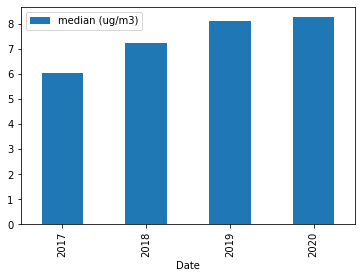

In [6]:
bar_plot_info.plot(kind="bar", y="median (ug/m3)")

In [7]:
#combine three previous years into an average median value
prior_years_df = bar_plot_info.loc[bar_plot_info.index<2020]
prior_averages = prior_years_df.mean()
prior_averages

count             121.756276
min (ug/m3)         1.478454
max (ug/m3)        24.854512
median (ug/m3)      7.131560
dtype: float64

,average median during shutdown dates (ug/m3)
Prior Years,NaN
2020,0.158448


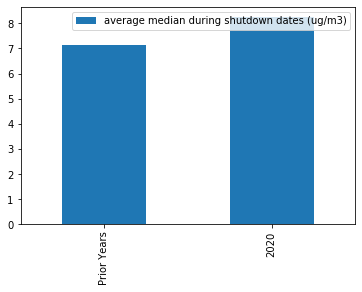

In [8]:
summary_bar_plot = pd.DataFrame({"average median during shutdown dates (ug/m3)":[prior_averages["median (ug/m3)"], 
                                                                                 bar_plot_info["median (ug/m3)"][2020]]}, 
                                index=["Prior Years", "2020"])

summary_bar_plot.plot(kind="bar")
summary_bar_plot.pct_change()